In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pyvista as pv 
import pandas as pd

In [17]:
cad_data = pd.read_csv('/Users/User/Documents/Project_JEB/JEB_Data/workingdata.csv')

In [18]:
cad_data

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_ver_stress,max_hor_magdisp,...,max_dia_magdisp,max_dia_stress,max_tor_magdisp,max_tor_stress,num_tets,mass,High_Stress_Area,Critical_Area_Ratio,max_stress,mean_curvature
0,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1057.485,1.000106,...,0.611791,752.3348,0.399737,432.3469,431759,0.464950,7166,0.081517,1057.485,0.075562
1,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,4823.208,0.965408,...,3.761250,4342.2860,0.495712,906.2914,314815,0.514034,5642,0.082070,4823.208,0.007987
2,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1008.945,1.608428,...,0.375712,469.8122,0.583333,676.9794,293971,0.399288,6173,0.102767,1008.945,0.083035
3,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1677.547,1.880950,...,0.787904,1507.5090,0.604398,826.2255,481030,0.350834,9194,0.094754,1919.958,0.067319
4,10,43107,86250,89919.885283,69797.809721,1.292692,10.0,0.981850,788.448,0.828652,...,0.466578,510.9708,0.396167,731.7008,401725,0.401942,9292,0.107458,788.448,0.037433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,626,18969,37978,168419.120292,44882.789988,1.590330,11.0,1.730170,1302.465,1.826851,...,0.492149,576.2344,0.334108,381.4059,208540,0.752833,4363,0.100283,1302.465,0.045066
281,628,32423,64902,91316.468632,31678.726188,1.012580,15.0,1.387795,1797.120,1.067089,...,0.599818,627.2844,0.407359,617.8683,454608,0.408185,7658,0.085365,1797.120,0.070349
282,630,24320,48660,95345.577454,30949.634456,1.149136,6.0,1.321775,1107.283,1.543620,...,0.320739,527.0447,0.577402,649.7908,283004,0.426195,5980,0.102781,1107.283,0.081732
283,631,9065,18150,64257.295481,25353.559413,1.775889,6.0,2.079509,1993.522,2.199358,...,0.584122,810.1162,0.991996,1108.9350,82414,0.287230,2024,0.111601,1993.522,0.067916


Designs where mass is less than the 75th Quantile

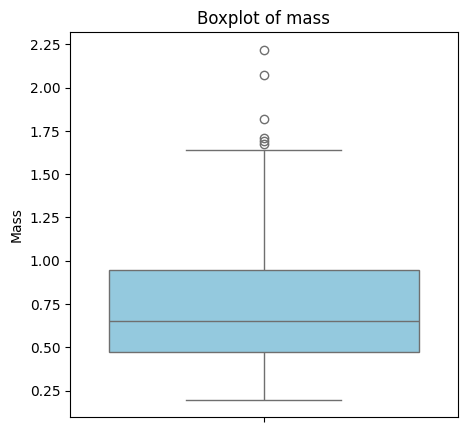

In [4]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=cad_data, y='mass', color='skyblue')
plt.title("Boxplot of mass")
plt.ylabel("Mass")
plt.show()

In [8]:
cad_data = cad_data[cad_data['mass'] < cad_data['mass'].quantile(0.75)]

In [10]:
cad_data

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_ver_stress,max_hor_magdisp,max_hor_stress,max_dia_magdisp,max_dia_stress,max_tor_magdisp,max_tor_stress,num_tets,mass,High_Stress_Area,Critical_Area_Ratio,max_stress
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1057.485,1.000106,908.3706,0.611791,752.3348,0.399737,432.3469,431759,0.464950,7166,0.081517,1057.485
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,4823.208,0.965408,1666.0090,3.761250,4342.2860,0.495712,906.2914,314815,0.514034,5642,0.082070,4823.208
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1008.945,1.608428,956.9317,0.375712,469.8122,0.583333,676.9794,293971,0.399288,6173,0.102767,1008.945
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1677.547,1.880950,1919.9580,0.787904,1507.5090,0.604398,826.2255,481030,0.350834,9194,0.094754,1919.958
5,10,43107,86250,89919.885283,69797.809721,1.292692,10.0,0.981850,788.448,0.828652,607.6455,0.466578,510.9708,0.396167,731.7008,401725,0.401942,9292,0.107458,788.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,626,18969,37978,168419.120292,44882.789988,1.590330,11.0,1.730170,1302.465,1.826851,977.3800,0.492149,576.2344,0.334108,381.4059,208540,0.752833,4363,0.100283,1302.465
376,628,32423,64902,91316.468632,31678.726188,1.012580,15.0,1.387795,1797.120,1.067089,1310.3700,0.599818,627.2844,0.407359,617.8683,454608,0.408185,7658,0.085365,1797.120
377,630,24320,48660,95345.577454,30949.634456,1.149136,6.0,1.321775,1107.283,1.543620,1038.0690,0.320739,527.0447,0.577402,649.7908,283004,0.426195,5980,0.102781,1107.283
378,631,9065,18150,64257.295481,25353.559413,1.775889,6.0,2.079509,1993.522,2.199358,1329.0300,0.584122,810.1162,0.991996,1108.9350,82414,0.287230,2024,0.111601,1993.522


After the weight factor has been controlled, lets find out the stress zones

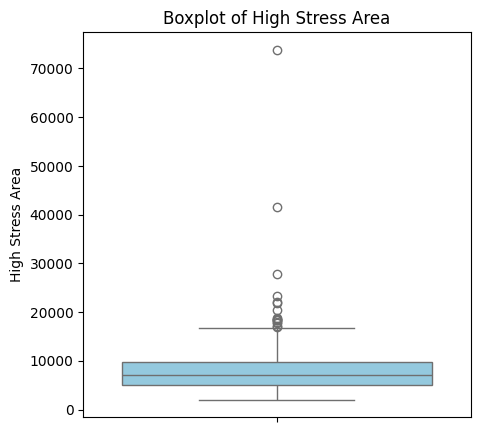

In [5]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=cad_data, y='High_Stress_Area', color='skyblue')
plt.title("Boxplot of High Stress Area")
plt.ylabel("High Stress Area")
plt.show()

In [11]:
#The outliers
Q1 = cad_data['High_Stress_Area'].quantile(0.25)
Q3 = cad_data['High_Stress_Area'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = cad_data[(cad_data['High_Stress_Area'] < lower_bound) | (cad_data['High_Stress_Area'] > upper_bound)]


outlier_ids = outliers[['id', 'High_Stress_Area']]
print(outlier_ids)

      id  High_Stress_Area
18    29             20457
50    82             18852
74   123             18586
89   142             41493
153  245             17893
176  281             73848
227  378             22105
237  390             18454
239  394             27883
260  428             23360
279  464             17179
329  545             18429
334  550             21780
358  592             18400


Remove these rows from the working data

In [12]:
cad_data = cad_data[~cad_data['id'].isin(outlier_ids)]

In [13]:
cad_data

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_ver_stress,max_hor_magdisp,max_hor_stress,max_dia_magdisp,max_dia_stress,max_tor_magdisp,max_tor_stress,num_tets,mass,High_Stress_Area,Critical_Area_Ratio,max_stress
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1057.485,1.000106,908.3706,0.611791,752.3348,0.399737,432.3469,431759,0.464950,7166,0.081517,1057.485
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,4823.208,0.965408,1666.0090,3.761250,4342.2860,0.495712,906.2914,314815,0.514034,5642,0.082070,4823.208
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1008.945,1.608428,956.9317,0.375712,469.8122,0.583333,676.9794,293971,0.399288,6173,0.102767,1008.945
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1677.547,1.880950,1919.9580,0.787904,1507.5090,0.604398,826.2255,481030,0.350834,9194,0.094754,1919.958
5,10,43107,86250,89919.885283,69797.809721,1.292692,10.0,0.981850,788.448,0.828652,607.6455,0.466578,510.9708,0.396167,731.7008,401725,0.401942,9292,0.107458,788.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,626,18969,37978,168419.120292,44882.789988,1.590330,11.0,1.730170,1302.465,1.826851,977.3800,0.492149,576.2344,0.334108,381.4059,208540,0.752833,4363,0.100283,1302.465
376,628,32423,64902,91316.468632,31678.726188,1.012580,15.0,1.387795,1797.120,1.067089,1310.3700,0.599818,627.2844,0.407359,617.8683,454608,0.408185,7658,0.085365,1797.120
377,630,24320,48660,95345.577454,30949.634456,1.149136,6.0,1.321775,1107.283,1.543620,1038.0690,0.320739,527.0447,0.577402,649.7908,283004,0.426195,5980,0.102781,1107.283
378,631,9065,18150,64257.295481,25353.559413,1.775889,6.0,2.079509,1993.522,2.199358,1329.0300,0.584122,810.1162,0.991996,1108.9350,82414,0.287230,2024,0.111601,1993.522


In [33]:

cad_data['Critical_Area_Ratio'] = 0  

for part_id in cad_data['id']:
    
    print(part_id)
    vtk_file_path = f"/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_volmesh_(vtk)/{part_id}.vtk"
    if part_id <= 308:
        fea_file_path = f"/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_simresults_.csv._firsthalf/SimJEB_simresults_(csv)_firsthalf/{part_id}field.csv"
    else:
        fea_file_path = f"/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_simresults_.csv._secondhalf/SimJEB_simresults_(csv)_secondhalf/{part_id}field.csv"
    
   
    mesh = pv.read(vtk_file_path)

    
    sim_data = pd.read_csv(fea_file_path)
    stress_columns = ['ver_stress', 'hor_stress', 'dia_stress', 'tor_stress']
    sim_data['Stress'] = sim_data[stress_columns].max(axis=1)

   
    stress = sim_data['Stress'].values
    mesh.point_data['Stress'] = stress

    
    stress_threshold = sim_data['Stress'].quantile(0.95)
    critical_areas = mesh.threshold(value=stress_threshold, scalars='Stress')

   
    cad_data.loc[cad_data['id'] == part_id, 'Critical_Area_Ratio'] = critical_areas.n_points / mesh.n_points



updated_cad_data_path = '/Users/User/Documents/Project_JEB/Results/Data_Analysis/updated_cad_data.csv'
cad_data.to_csv(updated_cad_data_path, index=False)


0
4
6
8
9
10
12
14
15
16
19
20
21
22
23
25
27
28
29
30
33
34
35
38
39
40
50
51
53
55
56
58
59
61
62
63
64
65
66
69
70
71
72
73
76
77
78
79
80
81
82
86
87
91
92
94
95
96
97
98
101
102
106
107
108
112
113
114
115
116
119
120
121
122
123
124
125
127
129
130
131
133
134
135
136
138
139
140
141
142
146
147
148
149
150
152
153
163
164
165
166
167
169
170
171
173
174
175
177
180
181
182
183
185
186
187
191
192
193
194
195
196
197
198
199
200
202
204
205
206
207
208
209
211
213
214
217
220
221
223
225
228
229
230
233
234
235
236
237
238
240
241
242
245
246
247
248
249
252
254
255
256
257
258
259
261
262
266
267
268
269
270
271
275
279
280
281
282
284
285
289
290
291
293
295
296
297
302
306
308
309
310
311
312
316
318
319
320
321
322
323
324
325
329
331
332
335
336
337
339
342
345
348
351
356
357
361
362
364
365
366
369
371
373
374
375
377
378
379
380
382
383
384
386
387
388
389
390
393
394
395
398
400
403
406
407
411
412
413
415
416
417
418
419
420
421
422
424
425
427
428
432
433
434
437
438
4

In [15]:
cad_data = cad_data.drop(columns=['max_ver_xdisp', 'max_ver_ydisp', 'max_ver_zdisp', 'max_hor_xdisp', 'max_hor_ydisp', 'max_hor_zdisp', 'max_dia_xdisp', 'max_dia_ydisp', 'max_dia_zdisp', 'max_tor_xdisp', 'max_tor_ydisp', 'max_tor_zdisp'])

In [40]:
cad_data = cad_data.drop(columns='Stress_Concentration')

In [41]:
cad_data.to_csv('/Users/User/Documents/Project_JEB/JEB_Data/workingdata.csv', index=False)

In [52]:
cad_data = pd.read_csv('/Users/User/Documents/Project_JEB/JEB_Data/workingdata.csv')

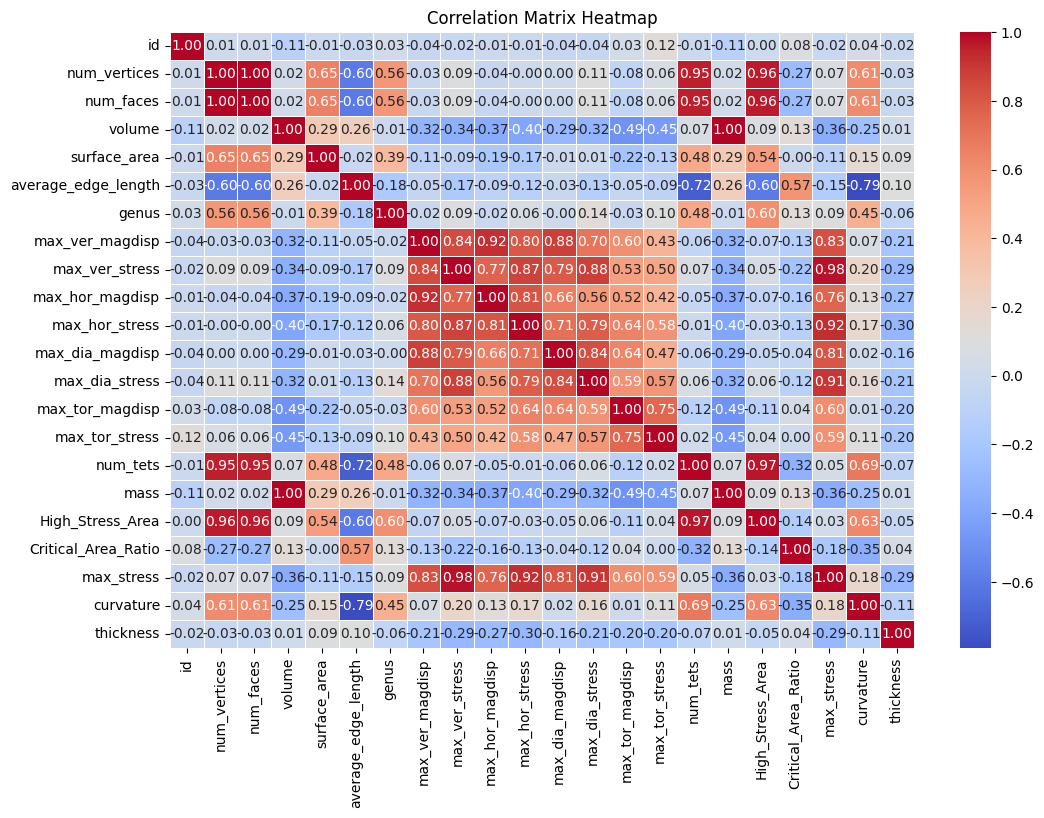

In [53]:
correlation_matrix = cad_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


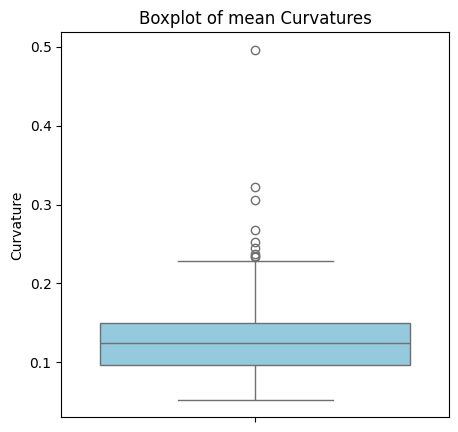

In [61]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=cad_data, y='curvature', color='skyblue')
plt.title("Boxplot of mean Curvatures")
plt.ylabel("Curvature")
plt.show()

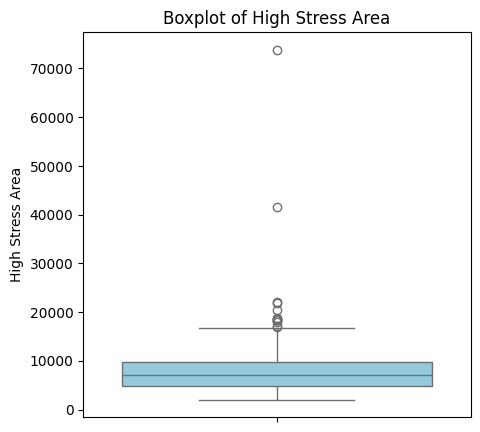

In [35]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=cad_data, y='High_Stress_Area', color='skyblue')
plt.title("Boxplot of High Stress Area")
plt.ylabel("High Stress Area")
plt.show()


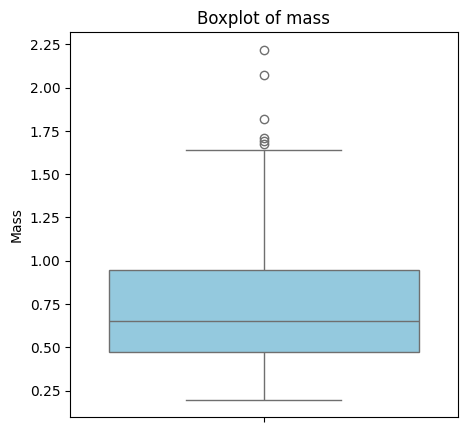

In [26]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=cad_data, y='mass', color='skyblue')
plt.title("Boxplot of mass")
plt.ylabel("Mass")
plt.show()

In [33]:
cad_data = cad_data[cad_data['mass'] < cad_data['mass'].quantile(0.75)]

In [44]:
cad_data

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_ver_stress,max_hor_magdisp,max_hor_stress,max_dia_magdisp,max_dia_stress,max_tor_magdisp,max_tor_stress,num_tets,mass,High_Stress_Area,Critical_Area_Ratio,max_stress
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1057.485,1.000106,908.3706,0.611791,752.3348,0.399737,432.3469,431759,0.464950,7166,0.081517,1057.485
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,4823.208,0.965408,1666.0090,3.761250,4342.2860,0.495712,906.2914,314815,0.514034,5642,0.082070,4823.208
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1008.945,1.608428,956.9317,0.375712,469.8122,0.583333,676.9794,293971,0.399288,6173,0.102767,1008.945
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1677.547,1.880950,1919.9580,0.787904,1507.5090,0.604398,826.2255,481030,0.350834,9194,0.094754,1919.958
5,10,43107,86250,89919.885283,69797.809721,1.292692,10.0,0.981850,788.448,0.828652,607.6455,0.466578,510.9708,0.396167,731.7008,401725,0.401942,9292,0.107458,788.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,626,18969,37978,168419.120292,44882.789988,1.590330,11.0,1.730170,1302.465,1.826851,977.3800,0.492149,576.2344,0.334108,381.4059,208540,0.752833,4363,0.100283,1302.465
376,628,32423,64902,91316.468632,31678.726188,1.012580,15.0,1.387795,1797.120,1.067089,1310.3700,0.599818,627.2844,0.407359,617.8683,454608,0.408185,7658,0.085365,1797.120
377,630,24320,48660,95345.577454,30949.634456,1.149136,6.0,1.321775,1107.283,1.543620,1038.0690,0.320739,527.0447,0.577402,649.7908,283004,0.426195,5980,0.102781,1107.283
378,631,9065,18150,64257.295481,25353.559413,1.775889,6.0,2.079509,1993.522,2.199358,1329.0300,0.584122,810.1162,0.991996,1108.9350,82414,0.287230,2024,0.111601,1993.522


In [36]:

Q1 = cad_data['High_Stress_Area'].quantile(0.25)
Q3 = cad_data['High_Stress_Area'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = cad_data[(cad_data['High_Stress_Area'] < lower_bound) | (cad_data['High_Stress_Area'] > upper_bound)]


outlier_ids = outliers[['id', 'High_Stress_Area']]

In [37]:
outlier_ids

,id,High_Stress_Area
18,29,20457
50,82,18852
74,123,18586
89,142,41493
153,245,17893
176,281,73848
227,378,22105
236,389,17005
237,390,18454
279,464,17179


In [42]:
cad_data = cad_data[~cad_data['id'].isin(outlier_ids)]

In [43]:
cad_data

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_ver_stress,max_hor_magdisp,max_hor_stress,max_dia_magdisp,max_dia_stress,max_tor_magdisp,max_tor_stress,num_tets,mass,High_Stress_Area,Critical_Area_Ratio,max_stress
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1057.485,1.000106,908.3706,0.611791,752.3348,0.399737,432.3469,431759,0.464950,7166,0.081517,1057.485
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,4823.208,0.965408,1666.0090,3.761250,4342.2860,0.495712,906.2914,314815,0.514034,5642,0.082070,4823.208
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1008.945,1.608428,956.9317,0.375712,469.8122,0.583333,676.9794,293971,0.399288,6173,0.102767,1008.945
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1677.547,1.880950,1919.9580,0.787904,1507.5090,0.604398,826.2255,481030,0.350834,9194,0.094754,1919.958
5,10,43107,86250,89919.885283,69797.809721,1.292692,10.0,0.981850,788.448,0.828652,607.6455,0.466578,510.9708,0.396167,731.7008,401725,0.401942,9292,0.107458,788.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,626,18969,37978,168419.120292,44882.789988,1.590330,11.0,1.730170,1302.465,1.826851,977.3800,0.492149,576.2344,0.334108,381.4059,208540,0.752833,4363,0.100283,1302.465
376,628,32423,64902,91316.468632,31678.726188,1.012580,15.0,1.387795,1797.120,1.067089,1310.3700,0.599818,627.2844,0.407359,617.8683,454608,0.408185,7658,0.085365,1797.120
377,630,24320,48660,95345.577454,30949.634456,1.149136,6.0,1.321775,1107.283,1.543620,1038.0690,0.320739,527.0447,0.577402,649.7908,283004,0.426195,5980,0.102781,1107.283
378,631,9065,18150,64257.295481,25353.559413,1.775889,6.0,2.079509,1993.522,2.199358,1329.0300,0.584122,810.1162,0.991996,1108.9350,82414,0.287230,2024,0.111601,1993.522


In [39]:
data = pd.read_csv('/Users/User/Documents/Project_JEB/JEB_Data/workingdata.csv')
curvature_values = []
for part_id in data['id']:
    surface_path = f"/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_surfmesh_(obj)/{part_id}.obj"
    surface = pv.read(surface_path)
    curvature = np.quantile(np.abs(surface.curvature(curv_type='mean')), 0.75)
    curvature_values.append(curvature)

# Add the curvature column to the DataFrame
data['curvature'] = curvature_values
#data = data.drop(columns='mean_curvature')

# Save the updated data
updated_data_path = '/Users/User/Documents/Project_JEB/JEB_Data/workingdata.csv'
data.to_csv(updated_data_path, index=False)